In [2]:
# 🧪 EDA_and_Visualization.ipynb
# Full Exploratory Data Analysis for obstacle_detection dataset
# Updated to handle seq folders and nested img/ directories

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import defaultdict

In [ ]:
pip install seaborn


In [3]:
# ✅ Setup
BASE_PATH = "C:/Users/ashfa/OneDrive/Desktop/Drone_Obstacle_SLAM/data/obstacle_detection"
env_types = ["indoor_forward", "indoor_downward", "outdoor_forward", "outdoor_downward"]


In [4]:
# ✅ Load image paths from nested seq folders
env_image_paths = {}

for env in env_types:
    env_path = os.path.join(BASE_PATH, env)
    all_img_paths = []

    for seq_folder in os.listdir(env_path):
        seq_path = os.path.join(env_path, seq_folder)
        img_folder = os.path.join(seq_path, "img")
        
        if os.path.isdir(img_folder):
            images = [os.path.join(img_folder, f) for f in os.listdir(img_folder)
                      if f.endswith(('.jpg', '.png'))]
            all_img_paths.extend(images)

    env_image_paths[env] = all_img_paths

C:\Users\ashfa\AppData\Local\Temp\ipykernel_3088\166014620.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()), palette="viridis")


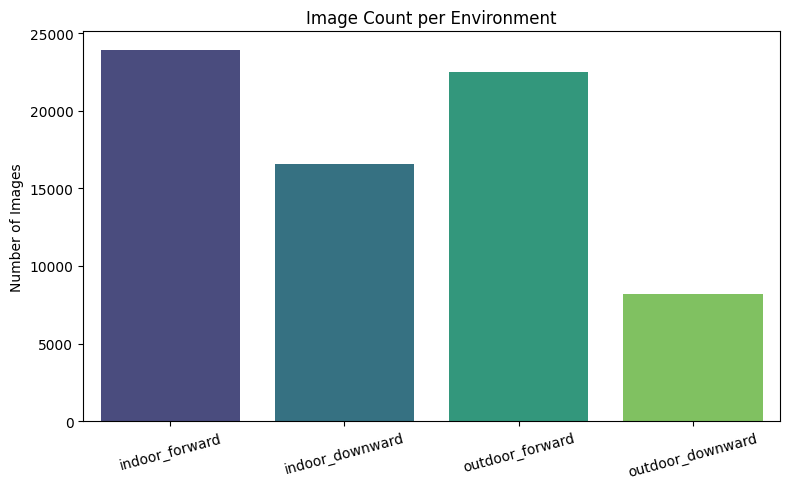

In [5]:
# ✅ Image count per environment
image_counts = {env: len(paths) for env, paths in env_image_paths.items()}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()), palette="viridis")
plt.title("Image Count per Environment")
plt.ylabel("Number of Images")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

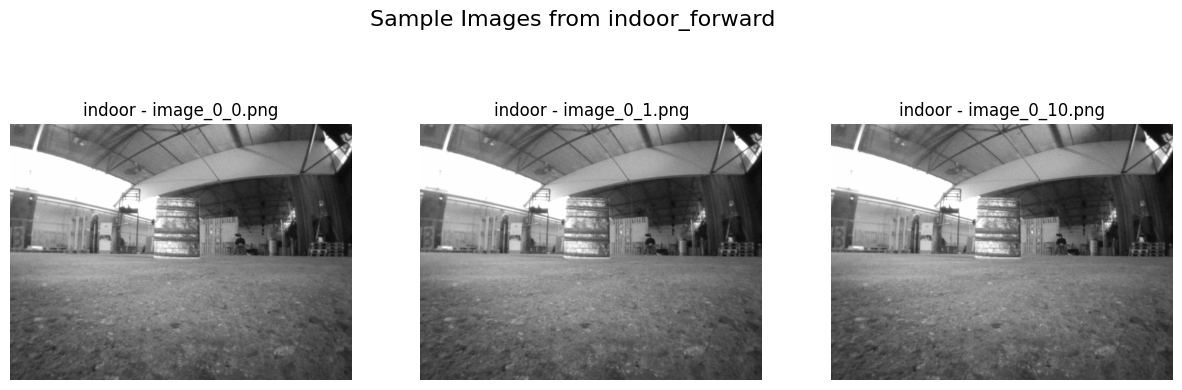

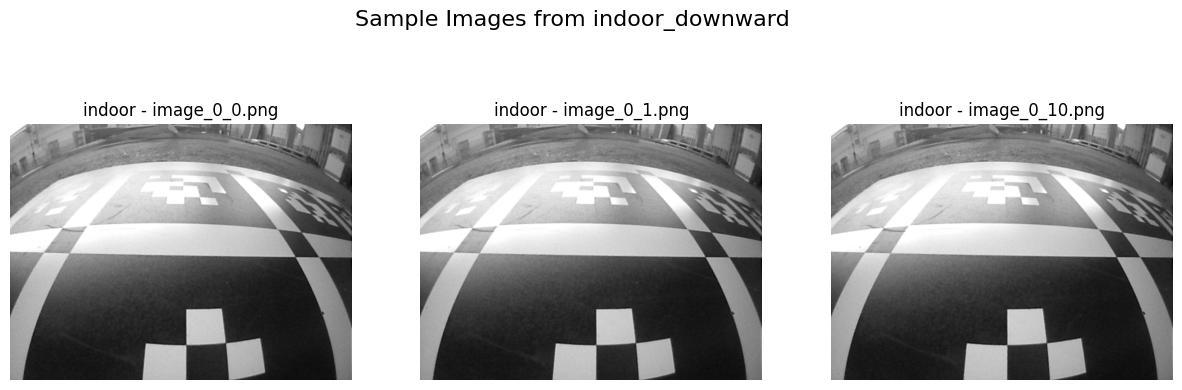

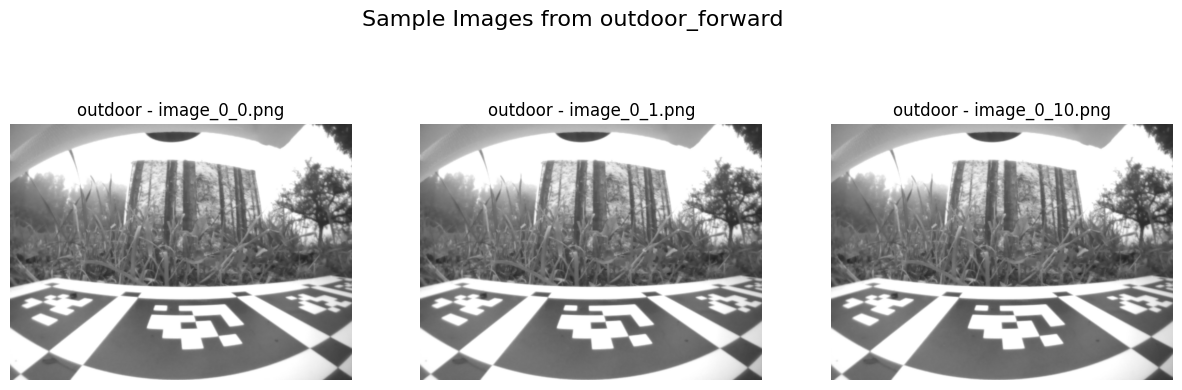

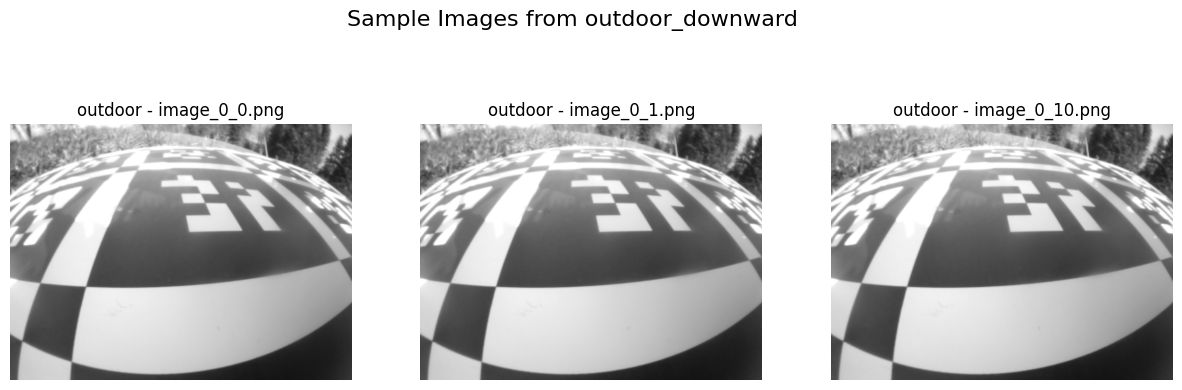

In [6]:
# ✅ Sample images per environment
for env in env_types:
    images = env_image_paths[env][:3]  # take first 3 images
    
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 3, i + 1)
        plt.imshow(img)
        plt.title(f"{env.split('_')[0]} - {os.path.basename(img_path)}")
        plt.axis("off")
    plt.suptitle(f"Sample Images from {env}", fontsize=16)
    plt.show()


In [7]:
# ✅ Image size distribution
size_data = defaultdict(list)

for env in env_types:
    for img_path in env_image_paths[env][:100]:  # limit to 100 per env to keep fast
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                size_data["width"].append(width)
                size_data["height"].append(height)
                size_data["env"].append(env)
        except Exception as e:
            print(f"Error reading {img_path}: {e}")



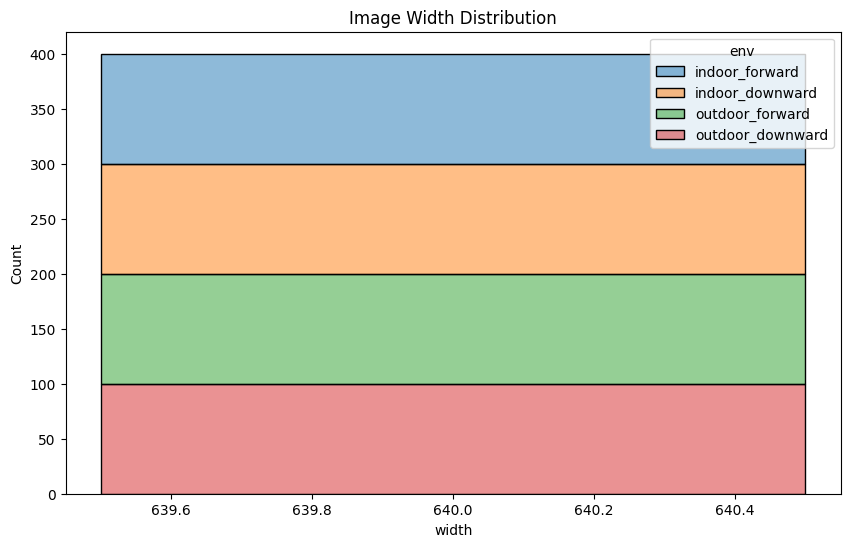

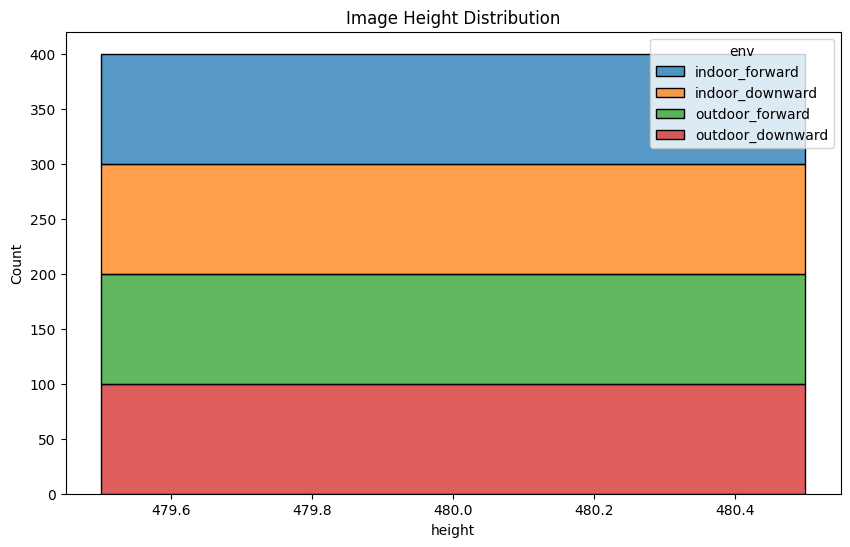

In [8]:
# 📊 Plot image size distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=size_data, x="width", hue="env", kde=True, multiple="stack")
plt.title("Image Width Distribution")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=size_data, x="height", hue="env", multiple="stack")
plt.title("Image Height Distribution")
plt.show()

In [10]:
# ✅ Color histogram for each environment
def plot_color_histogram(img_path, title):
    img = cv2.imread(img_path)
    chans = cv2.split(img)
    colors = ("b", "g", "r")
    plt.figure(figsize=(8, 4))
    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    plt.title(f"Color Histogram - {title}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()


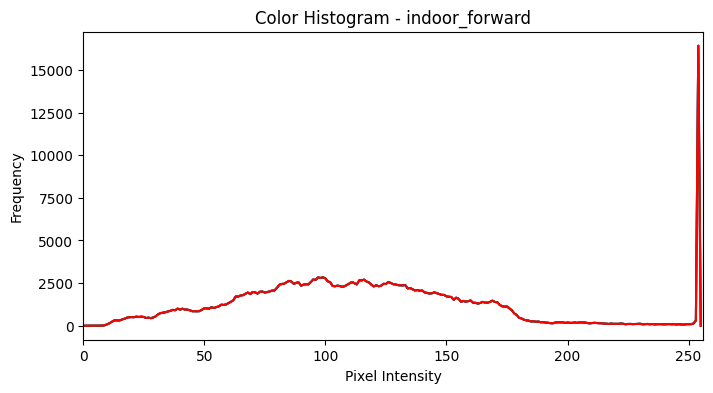

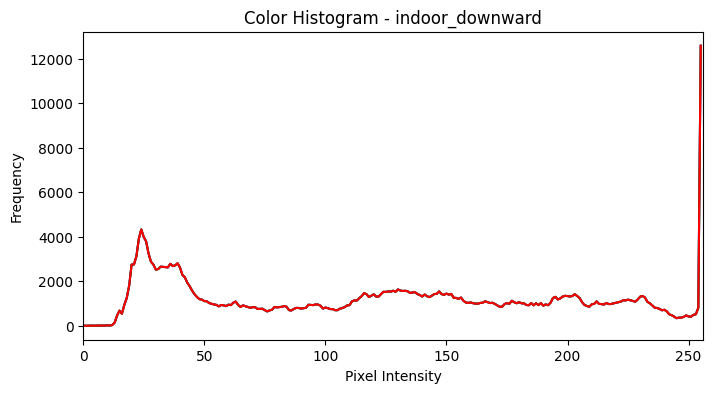

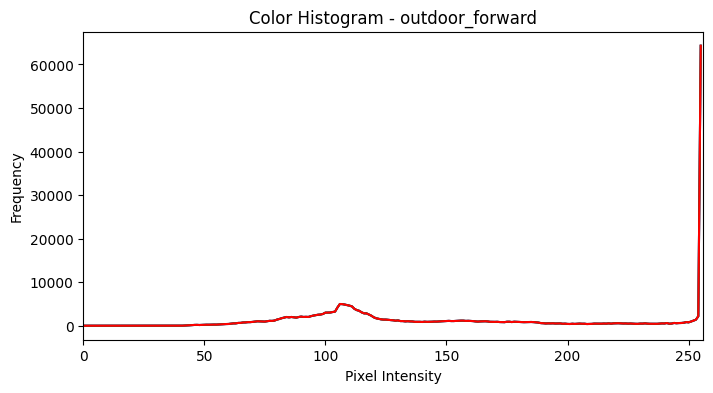

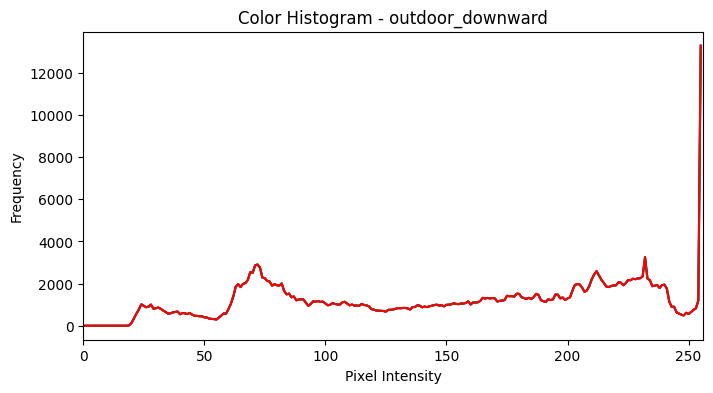

In [11]:
for env in env_types:
    images = env_image_paths[env]
    if images:
        plot_color_histogram(images[0], env)

In [25]:
# ✅ Summary
print("🎯 EDA complete:")
print("- ✅ Image count per environment")
print("- ✅ Sample image visualization")
print("- ✅ Resolution/size distribution")
print("- ✅ RGB channel histograms")

🎯 EDA complete:
- ✅ Image count per environment
- ✅ Sample image visualization
- ✅ Resolution/size distribution
- ✅ RGB channel histograms
